In [1]:
import astropy
import numpy as np
import random as rd
import h5py
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
%matplotlib inline 

In [3]:
# install python packages for jupyter kernel
# import sys
# !conda install --yes --prefix {sys.prefix} h5py

# Getting mask lines

In [66]:
f = open("outputtransitionsdata3.par", "r")
n_lines = sum(1 for line in open("outputtransitionsdata3.par", "r"))
is_h2o = [False for i in range(n_lines)]
is_o2 = [False for i in range(n_lines)]
intensities = np.zeros(n_lines)
wavelengths = np.zeros(n_lines)
for i in range(n_lines):
    new_line = f.readline()
    if len(new_line) > 0:
        is_h2o[i] = new_line[1] == '1'
        is_o2[i] = new_line[1] == '7'
        intensities[i] = float(new_line[16:25])
        wavelengths[i] = 1e7 / float(new_line[3:15])

In [67]:
sum(is_o2)

75

(array([32., 13.,  4.,  6.,  4.,  3.,  3.,  4.,  2.,  4.]),
 array([627.83293524, 628.80366578, 629.77439631, 630.74512685,
        631.71585739, 632.68658792, 633.65731846, 634.628049  ,
        635.59877954, 636.56951007, 637.54024061]),
 <a list of 10 Patch objects>)

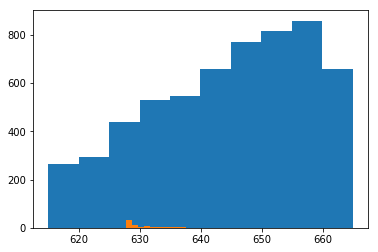

In [3]:
plt.hist(wavelengths[is_h2o])
plt.hist(wavelengths[is_o2])

In [4]:
intens_h2o = intensities[is_h2o]
wavelengths_h2o = wavelengths[is_h2o]
max_intens_h2o_inds = intens_h2o.argsort()[-10:][::-1]
print(wavelengths_h2o[max_intens_h2o_inds])
print(intens_h2o[max_intens_h2o_inds])

print()

intens_o2 = intensities[is_o2]
wavelengths_o2 = wavelengths[is_o2]
max_intens_o2_inds = intens_o2.argsort()[-2:][::-1]
print(wavelengths_o2[max_intens_o2_inds])
print(intens_o2[max_intens_o2_inds])

[647.76030132 654.57078608 651.65266482 649.76608413 649.25792824
 655.44297929 648.18434411 648.5027867  655.04263621 651.83424606]
[2.98e-24 2.80e-24 2.73e-24 2.52e-24 2.44e-24 2.35e-24 2.28e-24 2.28e-24
 2.01e-24 2.00e-24]

[628.08382587 627.98111474]
[2.216e-26 2.169e-26]


# Solar spectra and instrument PSF

In [5]:
try:
    fid = h5py.File("C:/Users/chris/Downloads/res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11.h5",'r')
except:
    fid = h5py.File("D:/Christian/Downloads/res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11.h5",'r')

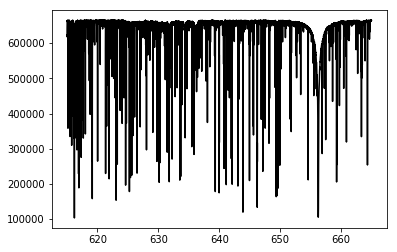

In [6]:
min_wav = 615
max_wav = 665
quiet = fid["quiet"][:]
lam = fid["lambdas"][:]/10
inds = [lam1 > min_wav and lam1 < max_wav for lam1 in lam]
plt.plot(lam[inds], quiet[inds], color="black")

In [7]:
psf_width = 50 / sum(inds) * 6  # 4 for NEID, 8-12 for EXPRESS
psf_width

0.0049090998347269725

# Line widths

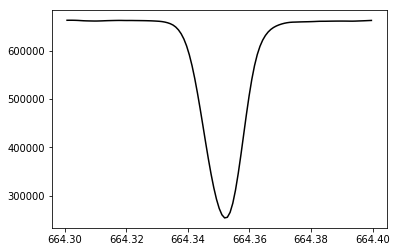

In [8]:
inds = [lam1 > 664.3 and lam1 < 664.4 for lam1 in lam]
quiet_line = quiet[inds]
quiet_lam = lam[inds]
plt.plot(quiet_lam, quiet_line, color="black")

In [9]:
HM = (max(quiet_line) + min(quiet_line)) / 2

In [10]:
hmm = quiet_lam[quiet_line < HM]
FWHM = hmm[-1] - hmm[0]
solar_sigma = FWHM / (2 * np.sqrt(2 * np.log(2)))
print(solar_sigma)
telluric_sigma = solar_sigma / np.sqrt(2)
print(telluric_sigma)

0.00562251031785677
0.003975715173047852


# Airmasses

In [12]:
vega = SkyCoord.from_name('Vega')  
kitt_peak = EarthLocation.of_site('Kitt Peak')
print(kitt_peak)
utcoffset = -6*u.hour  # Mountain Daylight Time
midnight = Time('2019-1-23 00:00:00') - utcoffset

(-1994502.60430614, -5037538.54232911, 3358104.99690298) m


Wall time: 31.5 s


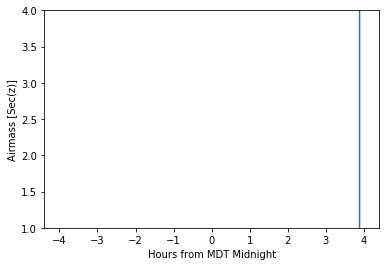

In [13]:
%%time 
midnight = Time('2019-1-23 00:00:00') - utcoffset
delta_midnight = np.linspace(-4, 4, 1000)*u.hour
vegaaltazs = vega.transform_to(AltAz(obstime=midnight+delta_midnight, location=kitt_peak))

plt.plot(delta_midnight, vegaaltazs.secz)  
# plt.xlim(-2, 7)  
plt.ylim(1, 4)  
plt.xlabel('Hours from MDT Midnight')  
plt.ylabel('Airmass [Sec(z)]')  

Wall time: 25.8 s


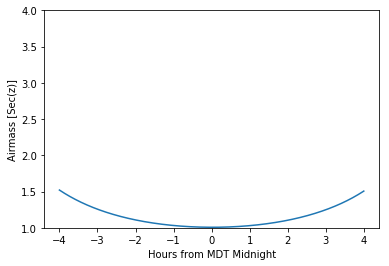

In [14]:
%%time 
midnight = Time('2019-7-23 00:00:00') - utcoffset
delta_midnight = np.linspace(-4, 4, 1000)*u.hour
vegaaltazs = vega.transform_to(AltAz(obstime=midnight+delta_midnight, location=kitt_peak))

plt.plot(delta_midnight, vegaaltazs.secz)  
# plt.xlim(-2, 7)  
plt.ylim(1, 4)  
plt.xlabel('Hours from MDT Midnight')  
plt.ylabel('Airmass [Sec(z)]')  

Wall time: 38.1 s


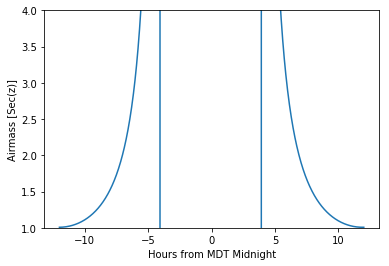

In [15]:
%%time 
midnight = Time('2020-1-23 00:00:00') - utcoffset
delta_midnight = np.linspace(-4, 4, 1000)*u.hour
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
vegaaltazs = vega.transform_to(AltAz(obstime=midnight+delta_midnight, location=kitt_peak))

plt.plot(delta_midnight, vegaaltazs.secz)
# plt.xlim(-2, 7)
plt.ylim(1, 4)
plt.xlabel('Hours from MDT Midnight')  
plt.ylabel('Airmass [Sec(z)]')  

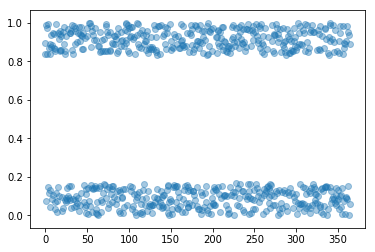

In [16]:
PROT = 25.05
times = (fid["phases"][:] * PROT - 1/6)
plt.scatter(times, times % 1, alpha=0.4)
times -= np.linspace(-0.5, 0.5, len(times))
obs_times = midnight+(times*u.day)
aaframe = AltAz(obstime=obs_times, location=kitt_peak)

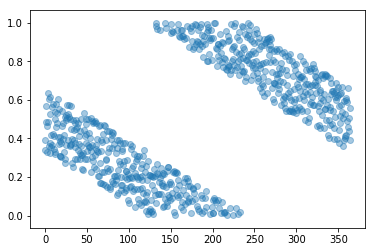

In [17]:
plt.scatter(times, times % 1, alpha=0.4)

In [18]:
%%time
vegaaltazs = vega.transform_to(aaframe)

Wall time: 30.8 s


In [19]:
%%time
sunaltazs = get_sun(obs_times).transform_to(aaframe)

Wall time: 1min 18s


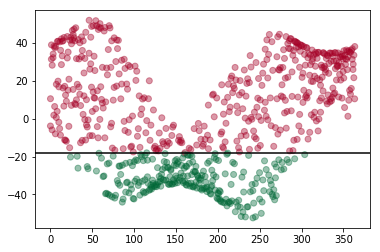

In [20]:
cs = sunaltazs.alt.deg < -18
plt.scatter(times, sunaltazs.alt.deg, alpha=0.4, c=cs, cmap="RdYlGn")
plt.axhline(-18, color='k')

In [21]:
sum(cs)

253

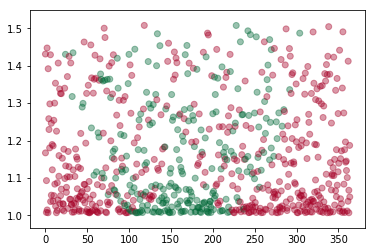

In [23]:
plt.scatter(times, vegaaltazs.secz, alpha=0.4, c=cs, cmap="RdYlGn")

In [33]:
np.save("valid_obs_res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11", cs)
np.save("times_res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11", times)
np.save("airmasses_res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11", vegaaltazs.secz.value)

# Making mask

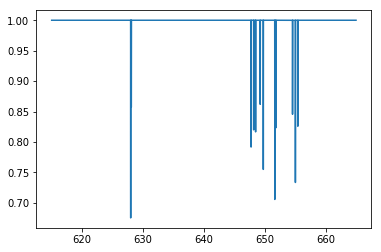

In [64]:
obs_resolution = 100000
n_mask = int(np.round((max_wav - min_wav) / (np.sqrt((max_wav**2 + min_wav**2) / 2) / obs_resolution)))
obs_waves = np.logspace(np.log10(min_wav), np.log10(max_wav), n_mask)

def gauss(x, a=1, loc=0, sigma=1):
    return a * np.exp(-((x-loc) / sigma)**2/2)

h2omask = np.ones(n_mask)

for wave in wavelengths_h2o[max_intens_h2o_inds]:
    h2omask *= 1 - gauss(obs_waves, 0.3 + 0.5*rd.random(), wave, telluric_sigma)

o2mask = np.ones(n_mask)

for wave in wavelengths_o2[max_intens_o2_inds]:
    o2mask *= 1 - gauss(obs_waves, 0.2 + 0.6*rd.random(), wave, telluric_sigma)

def tellurics(airmass):
    o2scale = airmass / 2
    h2oscale = airmass / 2 * (0.4 + 0.6*rd.random())
    return (o2scale * o2mask + (1 - o2scale)) * (h2oscale * h2omask + (1 - h2oscale))

# plt.plot(mask_waves, o2mask * h2omask)
plt.plot(obs_waves, tellurics(1))
# plt.xlim(min(wavelengths_h2o[max_intens_h2o_inds]) - 1, max(wavelengths_h2o[max_intens_h2o_inds]) + 1)

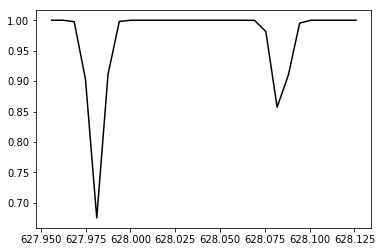

In [65]:
mask = tellurics(1)
inds = [lam1 > 627.95 and lam1 < 628.13 for lam1 in obs_waves]
quiet_line = mask[inds]
quiet_lam = obs_waves[inds]
plt.plot(quiet_lam, quiet_line, color="black")

# "Realistic" observations

start with observed spectra

add some planetary and barycentric motion and radial motion

interpolate to observed lambdas

multiply by mask as function of airmass

find telluric components with PCA

In [13]:
valid_obs = np.load("valid_obs_res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11.npy")
times = np.load("times_res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11.npy")
airmasses = np.load("airmasses_res-1000-lambda-3923-6664-1years_1579spots_diffrot_id11.npy")

In [14]:
min_wav = 615
max_wav = 665
lam = fid["lambdas"][:]/10
inds = [lam1 > (min_wav - 1) and lam1 < (max_wav + 1) for lam1 in lam]
test = fid["active"][0, :][inds]
lam = lam[inds]

In [15]:
c = 299792458
v = 14000
lam2 = lam * np.sqrt((1.0+v/c)/(1.0-v/c))

In [16]:
len(lam2)

63563

In [17]:
import interpolators as inter

In [18]:
hmm = inter.BandLimitedInterpolator()

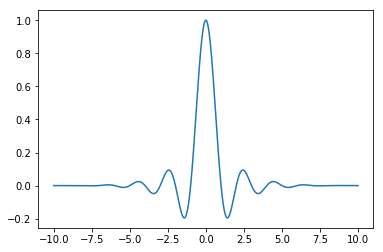

In [67]:
x = np.linspace(-10,10, 1000)
plt.plot(x, hmm.Filter(x))

In [69]:
%%time
lol = hmm.interpolate(obs_waves, lam2, test)

Wall time: 14.3 s
